In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA CLEANING

In [4]:
# Load the CSV file
content_df = pd.read_csv('datasets/Content.csv')
reactions_df = pd.read_csv('datasets/Reactions.csv')
reactiontype_df = pd.read_csv('datasets/ReactionTypes.csv')

# delete the order number 
content_df = content_df.drop(content_df.columns[0], axis=1)
reactions_df = reactions_df.drop(reactions_df.columns[0], axis=1)
reactiontype_df = reactiontype_df.drop(reactiontype_df.columns[0], axis=1)

#rename column
reactions_df = reactions_df.rename(columns={'Type': 'Reaction Type'})
reactiontype_df = reactiontype_df.rename(columns={'Type': 'Reaction Type'})
content_df = content_df.rename(columns={'Type': 'Content Type'})

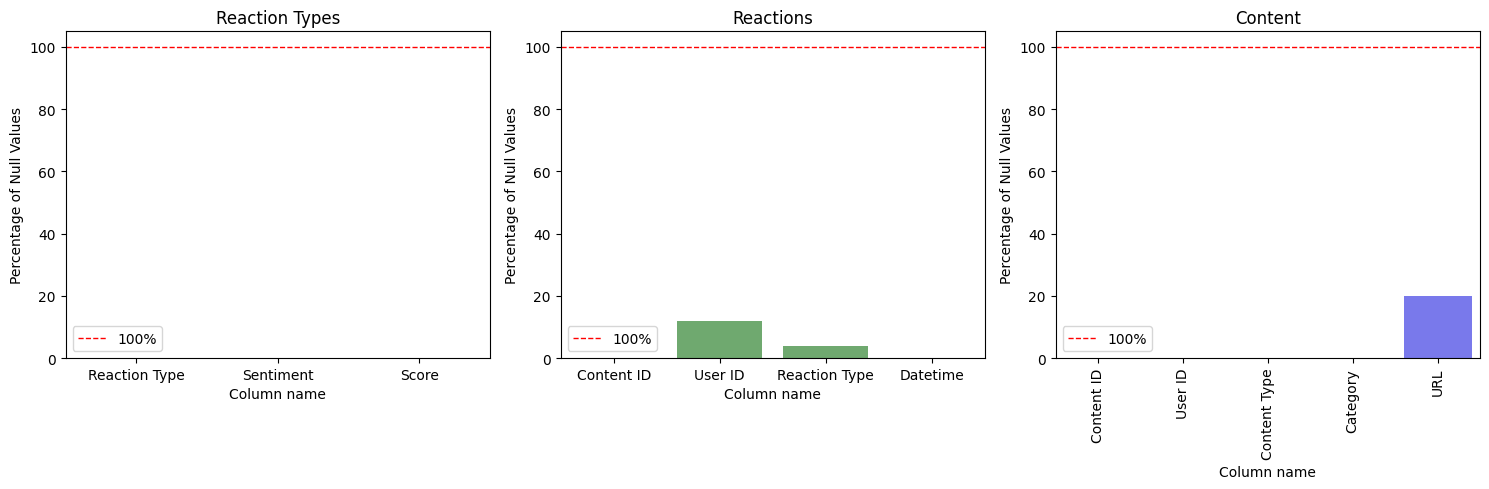

In [5]:
# Calculate percentage of null values in each column
null_percentage_df1 = content_df.isnull().mean() * 100
null_percentage_df2 = reactions_df.isnull().mean() * 100
null_percentage_df3 = reactiontype_df.isnull().mean() * 100


# Create subplots for each dataset
fig, (ax3, ax2, ax1) = plt.subplots(1, 3, figsize=(15, 5), sharex=False)

# Plotting for df1
sns.barplot(x=null_percentage_df1.index, y=null_percentage_df1, color='blue', alpha=0.6, ax=ax1)
ax1.axhline(y=100, color='red', linestyle='--', linewidth=1, label='100%')
ax1.set_ylabel('Percentage of Null Values')
ax1.set_title('Content')
ax1.legend()
ax1.set_xlabel('Column name')



# Plotting for df2
sns.barplot(x=null_percentage_df2.index, y=null_percentage_df2, color='green', alpha=0.6, ax=ax2)
ax2.axhline(y=100, color='red', linestyle='--', linewidth=1, label='100%')
ax2.set_ylabel('Percentage of Null Values')
ax2.set_title('Reactions')
ax2.legend()
ax2.set_xlabel('Column name')


# Plotting for df3
sns.barplot(x=null_percentage_df3.index, y=null_percentage_df3, color='orange', alpha=0.6, ax=ax3)
ax3.axhline(y=100, color='red', linestyle='--', linewidth=1, label='100%')
ax3.set_ylabel('Percentage of Null Values')
ax3.set_title('Reaction Types')
ax3.legend()
ax3.set_xlabel('Column name')


# Adjust layout and show plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [6]:
#Removing null values
reactions_df = reactions_df.dropna(subset=['Reaction Type'])
#Removing abnormal characters of some values within a column
content_df['Category'] = content_df['Category'].str.replace('"', '', regex=False)
#Removing unneeded columns: User_ID (as our bussines question is just focus on the most popularity contents), URL
content_df = content_df.drop(columns = ['User ID', 'URL'])
reactions_df = reactions_df.drop(columns = ['User ID'])

In [7]:
#Changing data type
reactions_df['Content ID'] = reactions_df['Content ID'].astype(str)
reactions_df['Reaction Type'] = reactions_df['Reaction Type'].astype(str)
content_df['Content ID'] = content_df['Content ID'].astype(str)
reactiontype_df['Reaction Type'] = reactiontype_df['Reaction Type'].astype(str)

DATA MODELLING

In [8]:
# Step 1: Merge reaction and content on 'Content ID'
merged_AB = pd.merge(reactions_df, content_df, on='Content ID', how='left')

# Step 2: Merge result with reaction type on 'Reactions type'
result = pd.merge(merged_AB, reactiontype_df, on='Reaction Type', how='left')
print(result)

                                 Content ID Reaction Type  \
0      97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   
1      97522e57-d9ab-4bd6-97bf-c24d952602d2       dislike   
2      97522e57-d9ab-4bd6-97bf-c24d952602d2        scared   
3      97522e57-d9ab-4bd6-97bf-c24d952602d2       disgust   
4      97522e57-d9ab-4bd6-97bf-c24d952602d2    interested   
...                                     ...           ...   
24568  75d6b589-7fae-4a6d-b0d0-752845150e56       dislike   
24569  75d6b589-7fae-4a6d-b0d0-752845150e56     intrigued   
24570  75d6b589-7fae-4a6d-b0d0-752845150e56    interested   
24571  75d6b589-7fae-4a6d-b0d0-752845150e56       worried   
24572  75d6b589-7fae-4a6d-b0d0-752845150e56       cherish   

                  Datetime Content Type    Category Sentiment  Score  
0      2020-11-07 09:43:50        photo    Studying  negative      0  
1      2021-06-17 12:22:51        photo    Studying  negative     10  
2      2021-04-18 05:13:58        photo    Studying  n

In [9]:
result.to_csv('data_modelling.csv', index=False)

print("CSV file saved successfully.")

CSV file saved successfully.


In [10]:
# Group by 'category' and sum the 'score'
category_scores = result.groupby('Category')['Score'].sum()

# Sort the summed scores in descending order and extract the top 5
top_5_categories = category_scores.sort_values(ascending=False).head(5)
print(top_5_categories)


Category
animals           71242
healthy eating    69067
technology        68521
science           66549
culture           64952
Name: Score, dtype: int64


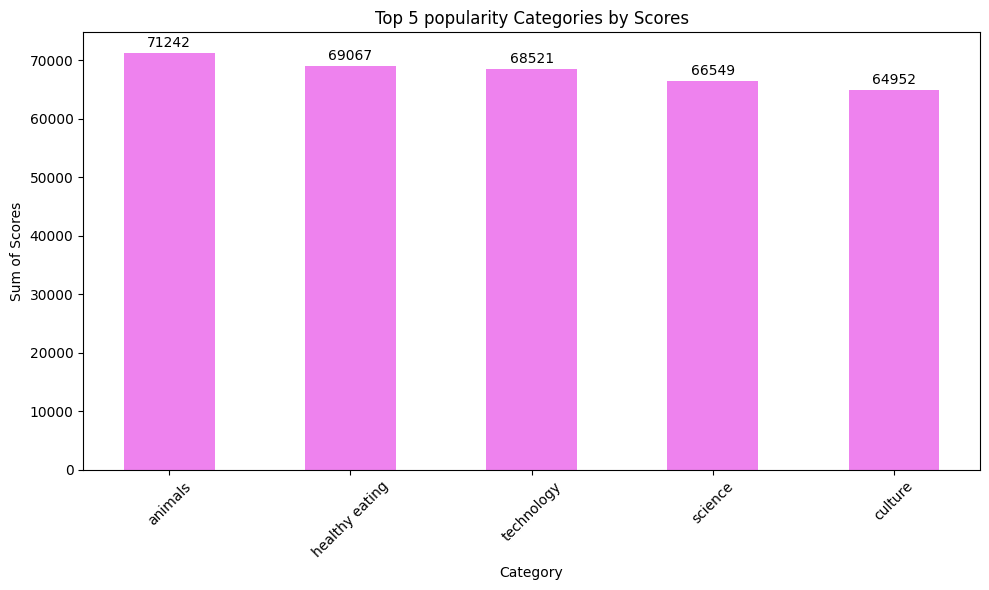

In [11]:
plt.figure(figsize=(10, 6))  # Adjust size of the figure (width, height)
bar_width = 0.5
bars = plt.bar(top_5_categories.index, top_5_categories.values, color='violet', width=bar_width)

plt.xlabel('Category')
plt.ylabel('Sum of Scores')
plt.title('Top 5 popularity Categories by Scores')


plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 500, int(yval), ha='center', va='bottom')

plt.show()

In [12]:
unique_content_ids = reactions_df['Content ID'].nunique()
print(unique_content_ids)


962


In [13]:
unique_category_ids = content_df['Category'].nunique()
print(unique_category_ids)
print(content_df['Category'].unique())

29
['Studying' 'healthy eating' 'technology' 'food' 'cooking' 'dogs' 'soccer'
 'public speaking' 'science' 'tennis' 'travel' 'fitness' 'education'
 'studying' 'veganism' 'Animals' 'animals' 'culture' 'Fitness' 'Veganism'
 'Travel' 'Education' 'Technology' 'Soccer' 'Culture' 'Food'
 'Healthy Eating' 'Science' 'Public Speaking']


In [15]:
result['Category']= result['Category'].str.capitalize()
print(result.nunique())

Content ID         962
Reaction Type       16
Datetime         24562
Content Type         4
Category            16
Sentiment            3
Score               15
dtype: int64


In [16]:
# Convert the 'Date' column to datetime
result['Datetime'] = pd.to_datetime(result['Datetime'])

# Extract the month from the 'Date' column
result['Month'] = result['Datetime'].dt.month

# Count the number of posts per month
monthly_post_counts = result['Month'].value_counts()

# Find the month with the most posts
most_posts_month = monthly_post_counts.idxmax()
most_posts_count = monthly_post_counts.max()
print(most_posts_month)
print(most_posts_count)

5
2138


In [17]:
# Calculate sentiment distribution by content type
sentiment_distribution = result.groupby(['Category', 'Content ID']).size().unstack(fill_value=0)

# Normalize each row to get percentage distribution
#sentiment_distribution = sentiment_distribution.apply(lambda x: x / x.sum(), axis=1)
print(sentiment_distribution)

Content ID       004e820e-49c3-4ba2-9d02-62db0065410c  \
Category                                                
Animals                                             0   
Cooking                                             0   
Culture                                             0   
Dogs                                                0   
Education                                           0   
Fitness                                             0   
Food                                                0   
Healthy eating                                      0   
Public speaking                                     0   
Science                                             0   
Soccer                                              0   
Studying                                            0   
Technology                                          0   
Tennis                                              1   
Travel                                              0   
Veganism                       

In [19]:
sentiment_distribution_by_category = result.groupby(['Category', 'Sentiment']).size().unstack(fill_value=0)
print("\nSentiment Distribution by Category:")
print(sentiment_distribution_by_category)



Sentiment Distribution by Category:
Sentiment        negative  neutral  positive
Category                                    
Animals               618      229      1050
Cooking               550      182       932
Culture               523      210       943
Dogs                  409      185       744
Education             430      188       815
Fitness               441      168       786
Food                  544      212       943
Healthy eating        520      212       985
Public speaking       363      142       712
Science               547      234      1015
Soccer                440      200       817
Studying              425      170       768
Technology            510      214       974
Tennis                450      162       716
Travel                533      196       918
Veganism              392      167       689


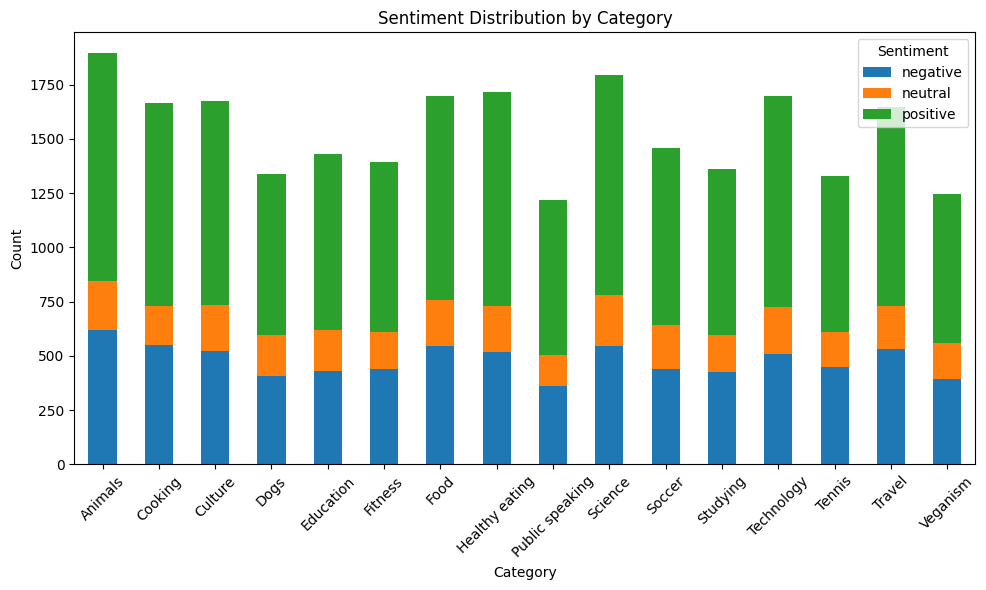

In [20]:
sentiment_distribution_by_category.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()